Imports

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
import seaborn as sns

# Load the dataset
data = pd.read_csv("static/Iris (1).csv")

# Display the first few rows of the dataset
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


EDA

C:\Users\swarn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\swarn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\swarn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping 

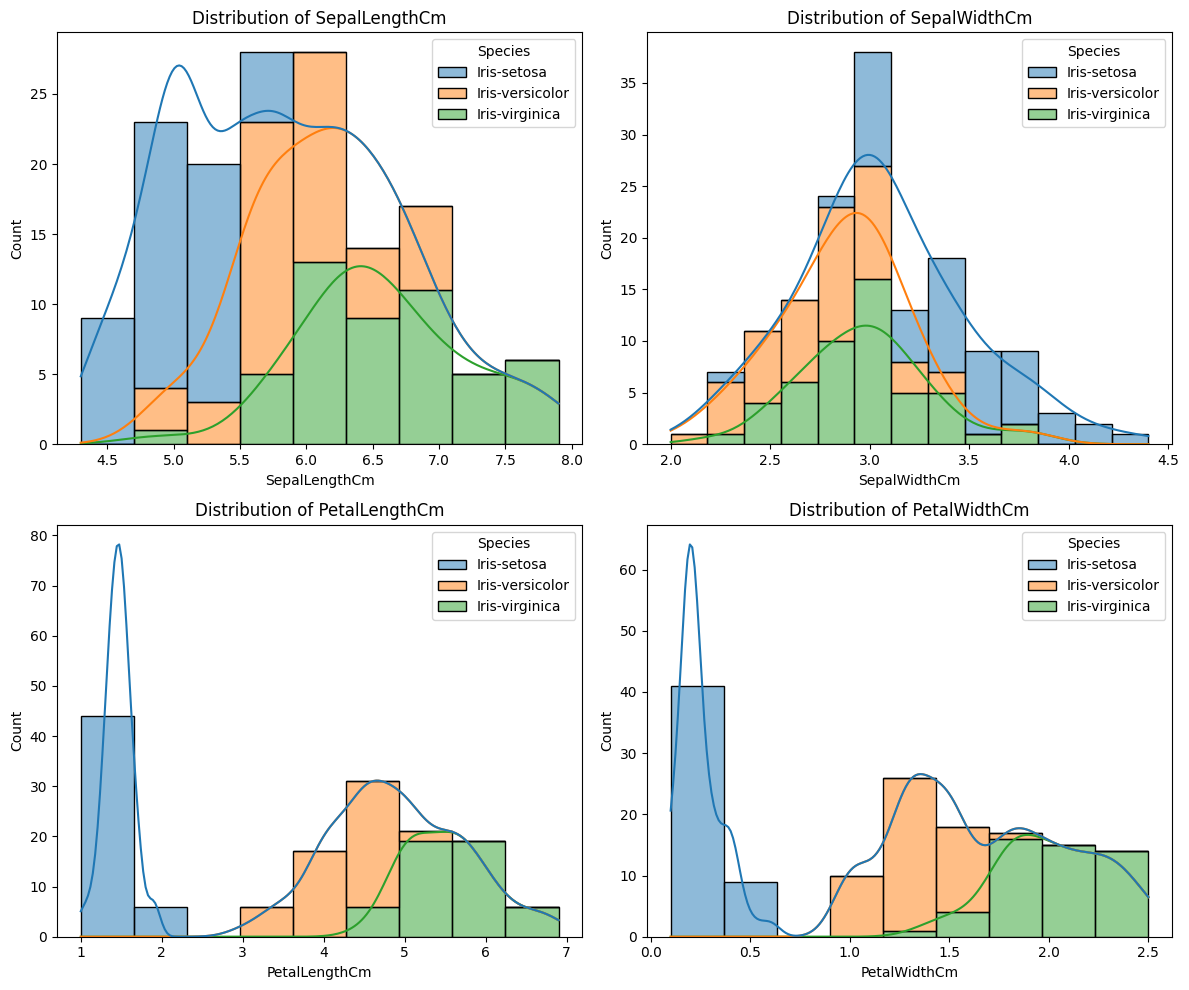

In [20]:
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

for i, col in enumerate(columns):
    plt.subplot(2, 2, i + 1)  # Adjust the subplot grid dimensions and index
    sns.histplot(data=data, x=col, hue='Species', kde=True, multiple='stack')
    plt.title(f'Distribution of {col}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Data Preprocessing

In [21]:
# Separate features and target variable
X = data.drop(['Id', 'Species'], axis=1)  # Features: all columns except 'Id' and 'Species'
y = data['Species']  # Target variable: 'Species'

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


Model Training and Evaluation

In [22]:
# Initialize a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the PCA-reduced training data
rf_model.fit(X_train, y_train)

# Predict on the PCA-reduced test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.90
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.88      0.78      0.82         9
 Iris-virginica       0.83      0.91      0.87        11

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



Plotting Confusion Matrix

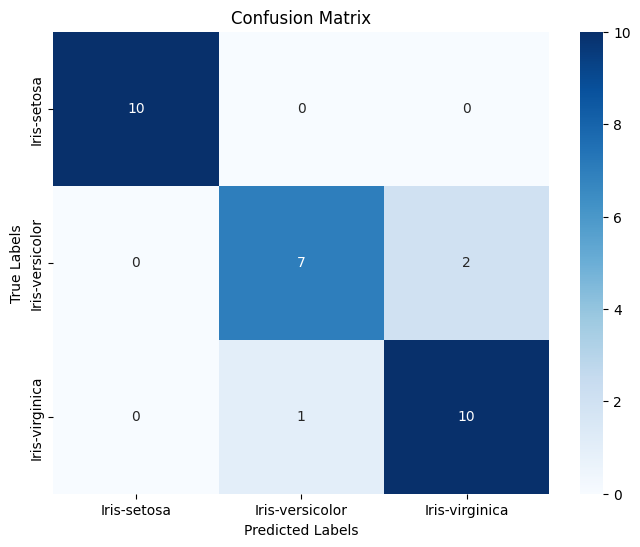

In [23]:
from sklearn.metrics import confusion_matrix


le = LabelEncoder()
le.fit(y_train)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Plotting Decision Boundaries

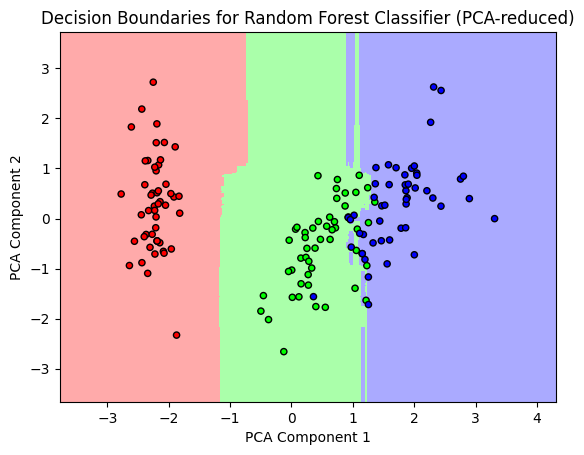

In [24]:
# Convert string labels to numeric indices
le = LabelEncoder()
y_numeric = le.fit_transform(y)

# Plotting decision boundaries
def plot_decision_boundaries(X, y, classifier, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = le.transform(Z)  # Convert predicted string labels to numeric indices
    
    # Reshape the predictions to match xx and yy shapes
    Z = Z.reshape(xx.shape)
    
    # Create a figure and plot the decision boundaries
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y_numeric, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# Plot decision boundaries
plot_decision_boundaries(X_pca, y, rf_model, "Decision Boundaries for Random Forest Classifier (PCA-reduced)")


Saving the Model

In [25]:
from joblib import dump, load

# Save the model to a file
model_filename = 'random_forest_iris_model.joblib'
dump(rf_model, model_filename)

print(f"Model saved to {model_filename}")


Model saved to random_forest_iris_model.joblib


In [26]:
# Load the model from the file
loaded_model = load('random_forest_iris_model.joblib')

# Verify the loaded model by making predictions
loaded_model_pred = loaded_model.predict(X_test)

# Check if the loaded model predictions match the original model predictions
print(f"Predictions match: {np.array_equal(y_pred, loaded_model_pred)}")


Predictions match: True
